<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/sismos_especial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Obtencion de Datos

SUBIMOS LOS DATOS DE EXCEL QUE NECESITAMOS


1.   MAGNITUDES
2.   INTERLLEGADAS, Magnitud > 6
3.   INTERLLEGADAS, Magnitud > 7




In [3]:
#subimos el excel donde se encuentran las magnitudes
magnitud_t=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSQFd_WhNNL6uAQWEg1UlETLqKaZxPgAUpgW7wY7ze6NrM0_C_JmXVglMpIROxaZA/pub?output=csv')


In [4]:
#subimos el excel donde se encuentran las llegadas Magnitud > 6
sismos6 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT6LM8x3cEPQtlmcZJy2IVtVgF_OqUqwM3sPkbXyqJAXvwhQYY8SacyCNAiAXs0yh0RmfBnmVjrd8R-/pub?output=csv')

In [5]:
#subimos el excel donde se encuentran las llegadas Magnitud > 7
sismos7 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwIELBKwwZD91Ib1_96POm_i8kG9uJhpEoXAfHzZWy4PifaD_0nJv4tMxcARMSqA/pub?output=csv')

# **Interllegadas > 6**

**Realizamos las graficas de interllegada para los sismos mayores a 6**

Para esto se realizo lo siguiente:

1.   sumamos fecha y horas para calcualar el total de tiempo
2.   convertimos el tiempo en días
3.   Ordenamos de manera ascendente los tiempos
4.   Seleccionamos de la tabla solo la columama de tiempo_interllegadas
5.   Quitamos el encabezado para obtener solo datos numéricos (eliminamos Nan)
6.   Realizamos el estimador insesgado (eje Y)

Una vez obtenidos los datos hacemos lo mismo para mayores a 7 y procedemos a graficar ambos resultados


In [6]:
#organiza valores para sismos > 6
sismos6['fecha_hora_6'] = pd.to_datetime(sismos6['Fecha UTC_6'] + ' ' + sismos6['Hora UTC_6'])

# Calcula los tiempos de interllegada
sismos6['tiempo_interllegada_6'] = sismos6['fecha_hora_6'].diff()

# Convierte los tiempos de interllegada a días
sismos6['tiempo_interllegada_dias_6'] = sismos6['tiempo_interllegada_6'].dt.total_seconds() / (24 * 3600)

# Acumula los tiempos de interllegada
sismos6['tiempo_acumulado_6'] = sismos6['tiempo_interllegada_dias_6'].cumsum()

print(sismos6[['fecha_hora_6', 'tiempo_interllegada_dias_6']])

           fecha_hora_6  tiempo_interllegada_dias_6
0   1900-01-20 06:33:30                         NaN
1   1900-05-16 20:12:00                  116.568403
2   1901-03-05 10:45:00                  292.606250
3   1901-12-09 02:17:00                  278.647222
4   1902-01-16 23:19:00                   38.876389
..                  ...                         ...
280 2022-11-04 10:02:48                   43.157407
281 2022-11-22 16:39:05                   18.275197
282 2023-06-18 20:30:22                  208.160613
283 2023-07-14 09:29:01                   25.540729
284 2024-05-12 11:39:11                  303.090394

[285 rows x 2 columns]


In [7]:
#ordena de mayor a menor sismos > 6
tiempo_6=sismos6.sort_values(by='tiempo_interllegada_dias_6', ascending=False)

In [8]:
#  > 6
#elige solo la columna de tiempo_interllegada_dias
tiempo_interllegada_6 = tiempo_6['tiempo_interllegada_dias_6']
print(tiempo_interllegada_6)

43     1152.125046
9      1014.661389
123     935.900706
180     804.503229
53      792.233426
          ...     
15        0.195833
161       0.171609
93        0.001644
127       0.001285
0              NaN
Name: tiempo_interllegada_dias_6, Length: 285, dtype: float64


In [9]:
#aqui se obtiene solo los datos numericos, se quita el encabezado

#cambia de serie a lista
tiempo_interllegada_lista_6 = tiempo_interllegada_6.tolist()
print(tiempo_interllegada_lista_6)

#Genera lista de interllegado(eje x)
interllegada_lista_6 = []
for iterllegadas_6 in tiempo_interllegada_lista_6[:-1]:
  interllegada_lista_6.append(iterllegadas_6)

#interllegadas sin NaN
print(interllegada_lista_6)

[1152.1250462962962, 1014.6613888888888, 935.9007060185185, 804.5032291666666, 792.2334259259259, 791.6006365740741, 665.4427430555555, 664.2566203703703, 649.4670601851852, 605.1670833333334, 589.2374537037037, 573.2560185185185, 568.4015740740741, 547.9862962962962, 547.6921759259259, 544.525625, 526.0274305555556, 517.9896064814815, 505.36541666666665, 493.29956018518516, 475.67284722222223, 441.42966435185184, 430.6196296296296, 425.61076388888887, 416.3653703703704, 415.1018287037037, 413.51653935185186, 403.68398148148145, 385.99983796296294, 371.85935185185184, 369.368125, 364.21488425925924, 362.47342592592594, 349.6906597222222, 341.1490856481482, 338.7783449074074, 334.95306712962963, 322.3322337962963, 313.9763541666667, 305.2883449074074, 303.0903935185185, 295.55443287037036, 292.60625, 291.50895833333334, 291.2972800925926, 290.92952546296294, 290.469537037037, 290.342962962963, 290.2402083333333, 278.64722222222224, 276.1765972222222, 266.26526620370373, 265.358599537037

In [10]:
#eje Y,  para magnitudes > 6
n_6 = len(interllegada_lista_6) # n=numero de interllegafdas

estimador_insesgado_6 = np.linspace(1/(n_6+1), n_6/(n_6+1), n_6)
print(estimador_insesgado_6)

[0.00350877 0.00701754 0.01052632 0.01403509 0.01754386 0.02105263
 0.0245614  0.02807018 0.03157895 0.03508772 0.03859649 0.04210526
 0.04561404 0.04912281 0.05263158 0.05614035 0.05964912 0.06315789
 0.06666667 0.07017544 0.07368421 0.07719298 0.08070175 0.08421053
 0.0877193  0.09122807 0.09473684 0.09824561 0.10175439 0.10526316
 0.10877193 0.1122807  0.11578947 0.11929825 0.12280702 0.12631579
 0.12982456 0.13333333 0.13684211 0.14035088 0.14385965 0.14736842
 0.15087719 0.15438596 0.15789474 0.16140351 0.16491228 0.16842105
 0.17192982 0.1754386  0.17894737 0.18245614 0.18596491 0.18947368
 0.19298246 0.19649123 0.2        0.20350877 0.20701754 0.21052632
 0.21403509 0.21754386 0.22105263 0.2245614  0.22807018 0.23157895
 0.23508772 0.23859649 0.24210526 0.24561404 0.24912281 0.25263158
 0.25614035 0.25964912 0.26315789 0.26666667 0.27017544 0.27368421
 0.27719298 0.28070175 0.28421053 0.2877193  0.29122807 0.29473684
 0.29824561 0.30175439 0.30526316 0.30877193 0.3122807  0.3157

# **Interllegas > 7**

**Realizamos las graficas de interllegada para los sismos mayores a 7**

Para esto;

1.   sumamos fecha y horas para calcualar el total de tiempo
2.   convertimos el tiempo en días
3.   Ordenamos de manera ascendente los tiempos
4.   Seleccionamos de la tabla solo la columama de tiempo_interllegadas
5.   Quitamos el encabezado para obtener solo datos numéricos (eliminamos Nan)
6.   Realizamos el estimador insesgado (eje Y)



In [11]:
#organiza valores para sismos > 7
sismos7['fecha_hora'] = pd.to_datetime(sismos7['Fecha UTC'] + ' ' + sismos7['Hora UTC'])

# Calcula los tiempos de interllegada
sismos7['tiempo_interllegada'] = sismos7['fecha_hora'].diff()

# Convierte los tiempos de interllegada a días
sismos7['tiempo_interllegada_dias'] = sismos7['tiempo_interllegada'].dt.total_seconds() / (24 * 3600)

print(sismos7[['fecha_hora', 'tiempo_interllegada_dias']])

            fecha_hora  tiempo_interllegada_dias
0  1900-01-19 06:33:30                       NaN
1  1902-04-19 02:23:00                819.826042
2  1902-09-23 20:18:00                157.746528
3  1902-12-12 23:10:00                 80.119444
4  1903-01-14 01:47:36                 32.109444
..                 ...                       ...
63 2017-09-19 18:14:39                 11.559282
64 2018-02-16 23:39:39                150.225694
65 2020-06-23 15:29:03                857.659306
66 2021-09-08 01:47:46                441.429664
67 2022-09-19 18:05:09                376.678738

[68 rows x 2 columns]


In [12]:
#ordena de mayor a menor el tiempo de llegadas > 7
tiempo_7=sismos7.sort_values(by='tiempo_interllegada_dias', ascending=False)


In [13]:
#elige solo la columna de tiempo_interllegada_dias
tiempo_interllegada_7= tiempo_7['tiempo_interllegada_dias']
print(tiempo_interllegada_7)

50    2911.733137
58    2629.857037
16    2602.829699
34    2417.766898
32    2308.343356
         ...     
22      14.982847
63      11.559282
53      11.460463
49       1.513484
0             NaN
Name: tiempo_interllegada_dias, Length: 68, dtype: float64


In [14]:
#aqui se obtiene solo los datos numericos, se quita el encabezado

#cambia de serie a lista
tiempo_interllegada_lista_7 = tiempo_interllegada_7.tolist()
print(tiempo_interllegada_lista_7)

#Genera lista de interllegado(eje x)
interllegada_lista_7 = []
for iterllegadas_7 in tiempo_interllegada_lista_7[:-1]:
  interllegada_lista_7.append(iterllegadas_7)

#interllegadas sin NaN
print(interllegada_lista_7)

[2911.7331365740743, 2629.857037037037, 2602.829699074074, 2417.7668981481484, 2308.3433564814814, 1977.2930092592592, 1748.2304050925925, 1238.5985648148148, 1209.3995486111112, 1188.288773148148, 1074.7642939814814, 1068.152361111111, 1029.4521296296296, 1007.291412037037, 991.8352662037037, 926.3566550925926, 889.9660300925926, 877.6379976851852, 857.6593055555555, 834.2270833333333, 827.9510648148148, 819.8260416666667, 786.715462962963, 733.7858333333334, 715.8070138888888, 677.0075, 634.9964930555556, 590.1571875, 589.2374537037037, 526.910775462963, 526.0274305555556, 505.36541666666665, 491.9431597222222, 490.49194444444447, 478.1855092592593, 441.42966435185184, 413.51653935185186, 376.6787384259259, 369.368125, 365.5199074074074, 348.1385648148148, 331.6063657407407, 321.72230324074076, 237.12480324074073, 231.9396064814815, 209.53436342592593, 199.4053935185185, 192.3413888888889, 184.3675, 162.33763888888888, 157.74652777777777, 150.39635416666667, 150.22569444444446, 127.0

In [15]:
#eje Y,  para magnitudes > 7
n_7 = len(interllegada_lista_7) # n=numero de interllegadas

estimador_insesgado_7 = np.linspace(1/(n_7+1), n_7/(n_7+1), n_7)
print(estimador_insesgado_7)

[0.01470588 0.02941176 0.04411765 0.05882353 0.07352941 0.08823529
 0.10294118 0.11764706 0.13235294 0.14705882 0.16176471 0.17647059
 0.19117647 0.20588235 0.22058824 0.23529412 0.25       0.26470588
 0.27941176 0.29411765 0.30882353 0.32352941 0.33823529 0.35294118
 0.36764706 0.38235294 0.39705882 0.41176471 0.42647059 0.44117647
 0.45588235 0.47058824 0.48529412 0.5        0.51470588 0.52941176
 0.54411765 0.55882353 0.57352941 0.58823529 0.60294118 0.61764706
 0.63235294 0.64705882 0.66176471 0.67647059 0.69117647 0.70588235
 0.72058824 0.73529412 0.75       0.76470588 0.77941176 0.79411765
 0.80882353 0.82352941 0.83823529 0.85294118 0.86764706 0.88235294
 0.89705882 0.91176471 0.92647059 0.94117647 0.95588235 0.97058824
 0.98529412]


# **Graficas de Interllegadas**

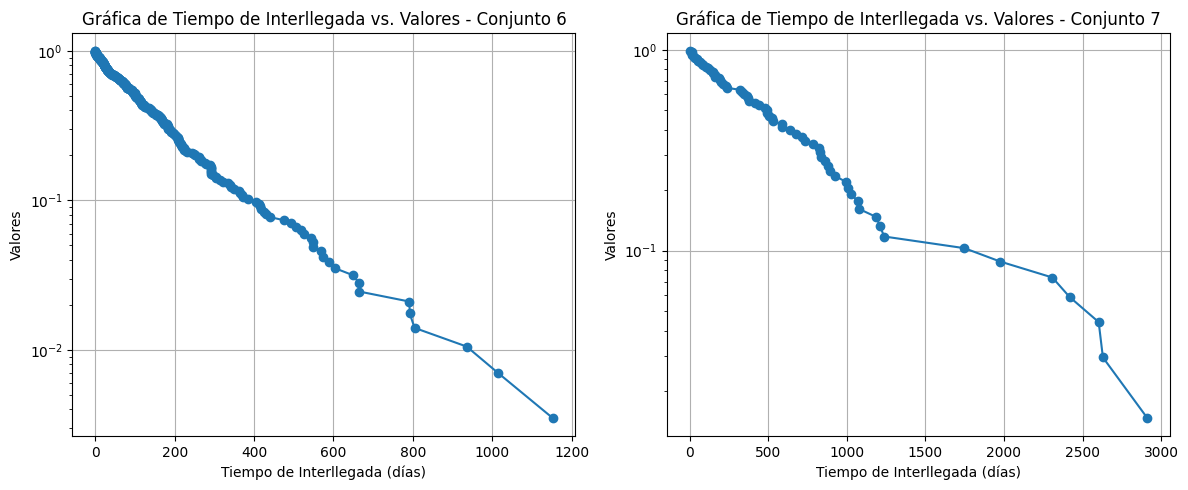

In [16]:
# Crea una figura y subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Dos subgráficas en una fila

# Gráfica para el conjunto de datos 6
ax1.semilogy(interllegada_lista_6, estimador_insesgado_6, marker='o', linestyle='-')
ax1.set_xlabel('Tiempo de Interllegada (días)')
ax1.set_ylabel('Valores')
ax1.set_title('Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 6')
ax1.grid(True)

# Gráfica para el conjunto de datos 7
ax2.semilogy(interllegada_lista_7, estimador_insesgado_7, marker='o', linestyle='-')
ax2.set_xlabel('Tiempo de Interllegada (días)')
ax2.set_ylabel('Valores')
ax2.set_title('Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 7')
ax2.grid(True)

# Ajusta el espacio entre las subgráficas
plt.tight_layout()
plt.show()

# **Pendiente de interllegadas**

Ahora calcularemos las pendientes, es decir la taza de llegadas de cada sismo

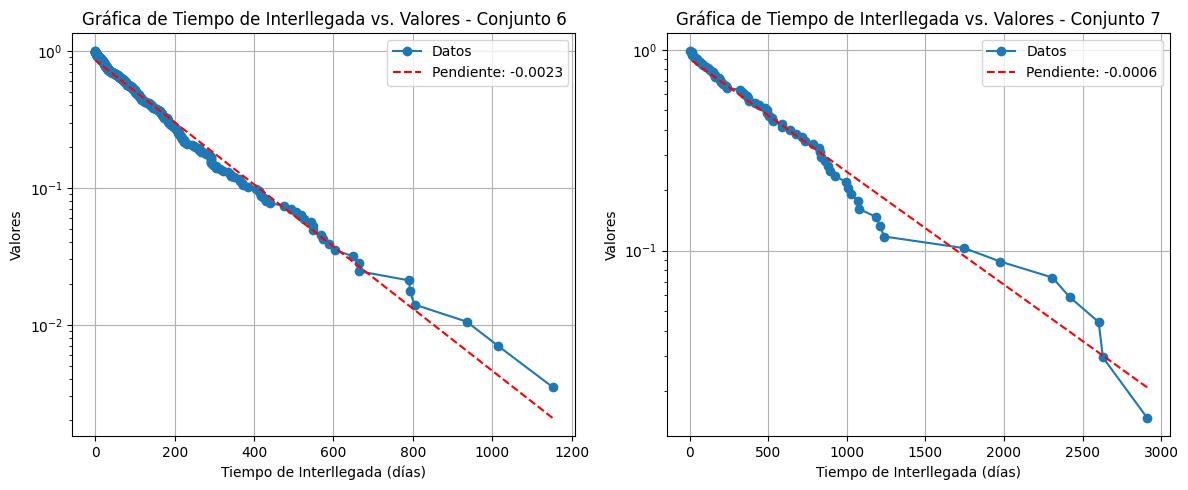

In [37]:
# Función para calcular y graficar la pendiente en una gráfica semilog
def plot_with_slope(ax, x_data, y_data, title):
    # Ajuste de regresión lineal en la escala logarítmica de y
    slope, intercept, _, _, _ = linregress(x_data, np.log10(y_data))

    # Genera la línea de tendencia usando la pendiente calculada
    trend_line = 10**(intercept + slope * np.array(x_data))

    # Grafica los datos
    ax.semilogy(x_data, y_data, marker='o', linestyle='-', label='Datos')
    ax.semilogy(x_data, trend_line, 'r--', label=f'Pendiente: {slope:.4f}')
    ax.set_xlabel('Tiempo de Interllegada (días)')
    ax.set_ylabel('Valores')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)


# Crea una figura y subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica con la pendiente para el conjunto de datos 6
plot_with_slope(ax1, interllegada_lista_6, estimador_insesgado_6, 'Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 6')

# Gráfica con la pendiente para el conjunto de datos 7
plot_with_slope(ax2, interllegada_lista_7, estimador_insesgado_7, 'Gráfica de Tiempo de Interllegada vs. Valores - Conjunto 7')

# Ajusta el espacio entre las subgráficas
plt.tight_layout()
plt.show()

Calculamos el inverso de las pendientes lambda_6=434.78 dias y lambda_7=1666.66 dias, lo que nos da la recurrencia sísmica de magnitud mayor o igual a 6 y 7, respectivamente.

Es decir, cada 434.78 dias hay probabilidad de que suceda un temblor >6 y cada 1666.66 dias hay probabilidad de que suceda un temblor >7

Para establecer la relacion con la Ley de Gutenberg richter: Log10(N)=a+b*M


**Ocurrencia de sismos al año**

con λ_6=434.78 y λ_7=1666.66

suponiendo que la interllegada sigue una exponencial

$1-F(t) = e^{-λt}$

# ***Generamos la grafica de gutenberg-Richter***

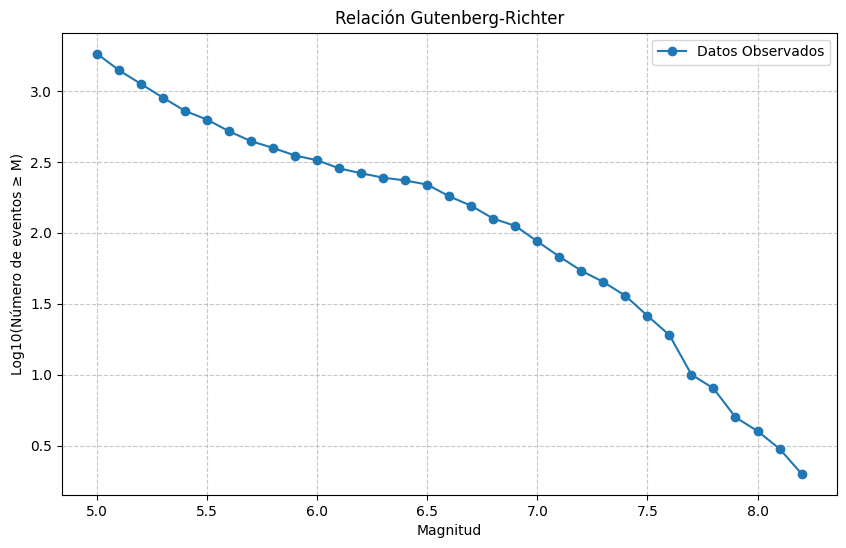

In [34]:
magnitud_t['magnitud']= magnitud_t['Magnitud'].astype(float)
magnitudes_sorted = sorted(magnitud_t['magnitud'].unique())
n_eventos_total = [sum(magnitud_t["Magnitud"] >= mag) for mag in magnitudes_sorted]

# Gráfica Gutenberg-Richter
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_sorted, np.log10(n_eventos_total), marker='o', linestyle='-', label="Datos Observados")
plt.title("Relación Gutenberg-Richter")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# pendiente
ahora usando regresion lineal por minimos cuadrados encontramos la pendiente

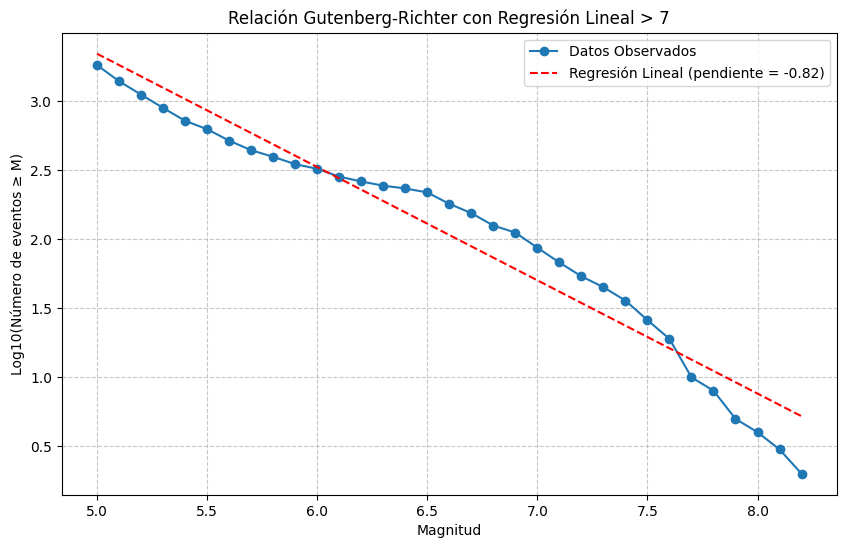

(-0.821312899311329,
 7.452512625985952,
 -0.9721800953906958,
 4.201787388102848e-21,
 0.035541207259077154)

In [35]:


# Calcular log10 del número de eventos
log_n_magnitudes = np.log10(n_eventos_total)

# Ajustar una regresión lineal por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(magnitudes_sorted, log_n_magnitudes)

# Crear los valores ajustados
line_fit = slope * np.array(magnitudes_sorted) + intercept

# Gráfica Gutenberg-Richter con la regresión lineal
plt.figure(figsize=(10, 6))
plt.plot(magnitudes_sorted, log_n_magnitudes, marker='o', linestyle='-', label="Datos Observados")
plt.plot(magnitudes_sorted, line_fit, color='red', linestyle='--', label=f"Regresión Lineal (pendiente = {slope:.2f})")
plt.title("Relación Gutenberg-Richter con Regresión Lineal > 7")
plt.xlabel("Magnitud")
plt.ylabel("Log10(Número de eventos ≥ M)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Mostrar detalles de la regresión
slope, intercept, r_value, p_value, std_err